<a href="https://colab.research.google.com/github/junghyun9108/NLP_class/blob/main/naver_news_info.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install selenium
!pip install konlpy wordcloud
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (6,933 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126333 files and dire

In [2]:
import re
from bs4 import BeautifulSoup
import requests
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import font_manager, rc, pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By

URL = "https://news.naver.com/"

options = webdriver.ChromeOptions()
options.add_argument(" --headless")
options.add_argument(" --disable-dev-shm-usage")
options.add_argument(" --no-sandbox")
driver = webdriver.Chrome(options=options)
driver.get(URL)
print(driver.title)

네이버 뉴스


In [4]:
comment_texts = driver.find_elements(By.CLASS_NAME, 'comment_text')
for tmp in comment_texts:
    print(tmp.text)

In [5]:
from bs4 import BeautifulSoup
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [6]:
import re

clean_titles = []

# strong 태그에 클래스가 cnf_news_title인 요소 모두 선택
titles = soup.select('strong.cnf_news_title')

# 텍스트만 출력
for tag in titles:
    raw = tag.get_text(strip=True)
    clean = re.sub(r'^\[.*?\]\s*', '', raw)
    clean_titles.append(clean)

print(clean_titles)

['“고양이 되고파, 성형에 1000만원 썼지만”… 얼굴 망가지고 부작용 ‘후회’, 무슨 사연?', "'서울대 10개 만들기' 가능할까? 이젠 바꿔야 한다", '피고인석 2열 앉은 그 남자의 ‘눈 가리고 아웅’', '이준석 “과감한 규제 해제로 전 국민 AI 활용 국가 만들 것”', '대구 함지산 산불로 1200여 명 대피…국가 소방동원령 발령', '1400원→1550원…수도권 지하철요금 6월 28일부터 인상', "대선 주자 AI 공약 '공염불'…원전 없이 전기공급 어떻게?", '"집앞까지 불씨, 상상도 못했다" 산불 공포, 잠 못드는 대구', '해병대 1사단 중사, 포항 아파트서 숨진 채 발견', '전국 대기 건조하고 강풍...봄철 폐 건강에 좋은 음식', "이승만 참배, 윤여준 영입...'통합' 내걸고 본선 돌입", '봉지욱 등 \'공소기각\' 주장에... 尹 명예훼손 재판부 "일단 재판"', '알짜기업 오아시스가 적자기업 티몬 품으면 벌어질 일', '특수교육 고교생 흉기 난동에 본인 포함 7명 부상…교육당국 "대응 논의"(종합)', "민주, 행안소위서 '지역화폐 1조원' 추경안 단독 처리…국힘 반발 퇴장", '월세 180만원 받는 김부장, 이거 깜빡하면 세금폭탄?', 'SKT 가입자들 집단소송 움직임… 손해 배상금 받을 수 있을까', '고준희 “살 빼다 몸 망가져”…‘이 시술’ 중 오열, 다이어트 어떻게 했길래?', 'SKT 해킹…유심칩 꼭 바꿔야 할까', '한덕수 앞에 세 개의 산…① 지지율 ② 국힘 후보 ③ 계엄 심판론', '프란치스코 교황이 남긴 것', '대구 함지산 산불, 입산 통제구역서 발화..야간에도 진화', "유심 동나고 시스템 지연…SKT 무료 교체 첫날, 곳곳서 '혼선'[현장+]", "유출 피해 없다지만…'SKT 해킹' 2차 피해 공포감↑", '공식 후보 된 이재명, 한덕수에 직격탄…"헌재 판결 무시, 명확한 헌법 파괴행위이자 사실상 내란행위"', '대구 함지산 불 확산에…소방청 ‘국가 소방동원령’ 발령', '대학원생 성폭행한 교수, "1

In [7]:
text = ' '.join(clean_titles)

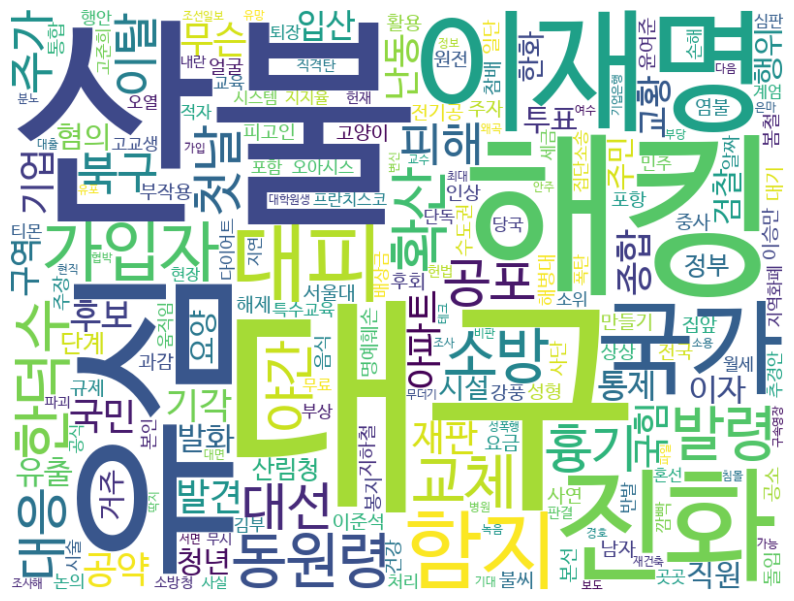

In [10]:
# 3. 형태소 분석기로 명사만 추출 (길이 2자 이상 필터)
okt = Okt()
nouns = okt.nouns(text)
filtered = [word for word in nouns if len(word) > 1]

# 4. 단어 빈도 계산
counts = Counter(filtered)

# 5. 워드클라우드 생성
wc = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
    background_color='white',
    width=800,
    height=600
)
wc.generate_from_frequencies(counts)

# 6. 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

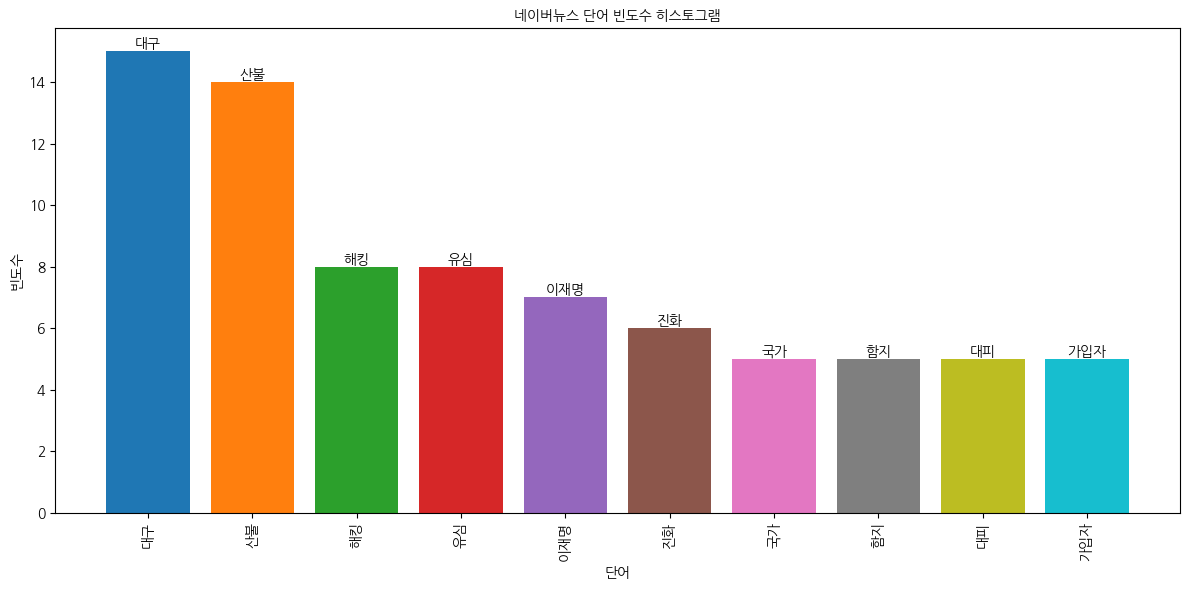

In [11]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_manager.fontManager.addfont(font_path)
fontprop = fm.FontProperties(fname=font_path)
prop = font_manager.FontProperties(fname=font_path)
font_name = prop.get_name()

rc('font', family=font_name)

# 탑 10 빈도 추출
top10_counts = counts.most_common(10)  # 빈도수 상위 10개 추출
words = [word for word, freq in top10_counts]
frequencies = [freq for word, freq in top10_counts]

# 히스토그램 생성
plt.figure(figsize=(12, 6))

for i, (word, frequency) in enumerate(zip(words, frequencies)):
    bar = plt.bar(i, frequency, label=word)
    text = plt.text(
        bar[0].get_x() + bar[0].get_width() / 2,
        bar[0].get_height(),
        word,
        ha='center',
        va='bottom',
        fontproperties=fontprop
    )

plt.title('네이버뉴스 단어 빈도수 히스토그램', fontproperties=fontprop)
plt.xlabel('단어', fontproperties=fontprop)
plt.ylabel('빈도수', fontproperties=fontprop)
plt.xticks(range(len(words)), words, rotation=90 , fontproperties=fontprop)  # x축 눈금 레이블에 폰트 설정
plt.tight_layout()
plt.show()